In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 15.1 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [7]:
!unzip /content/Vehicles-OpenImages.v1-416x416.yolov11.zip -d /content/yolo_dataset

Archive:  /content/Vehicles-OpenImages.v1-416x416.yolov11.zip
  inflating: /content/yolo_dataset/README.dataset.txt  
  inflating: /content/yolo_dataset/README.roboflow.txt  
  inflating: /content/yolo_dataset/data.yaml  
   creating: /content/yolo_dataset/test/
   creating: /content/yolo_dataset/test/images/
 extracting: /content/yolo_dataset/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
 extracting: /content/yolo_dataset/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
 extracting: /content/yolo_dataset/test/images/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  
 extracting: /content/yolo_dataset/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg  
 extracting: /content/yolo_dataset/test/images/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg  
 extracting: /content/yolo_dataset/test/images/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg  
 extracting: /content/yolo_dataset/test/images/10c26c6598677a1f_j

## Install YOLO


In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with a pre-trained model

In [20]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 78.1ms
Speed: 5.7ms preprocess, 78.1ms inference, 1160.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Fine-tuning the model on a custom dataset

In [10]:
!yolo task=detect mode=train data=/content/yolo_dataset/data.yaml model="yolo11n.pt" epochs=40 imgsz=416

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/yolo_dataset/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

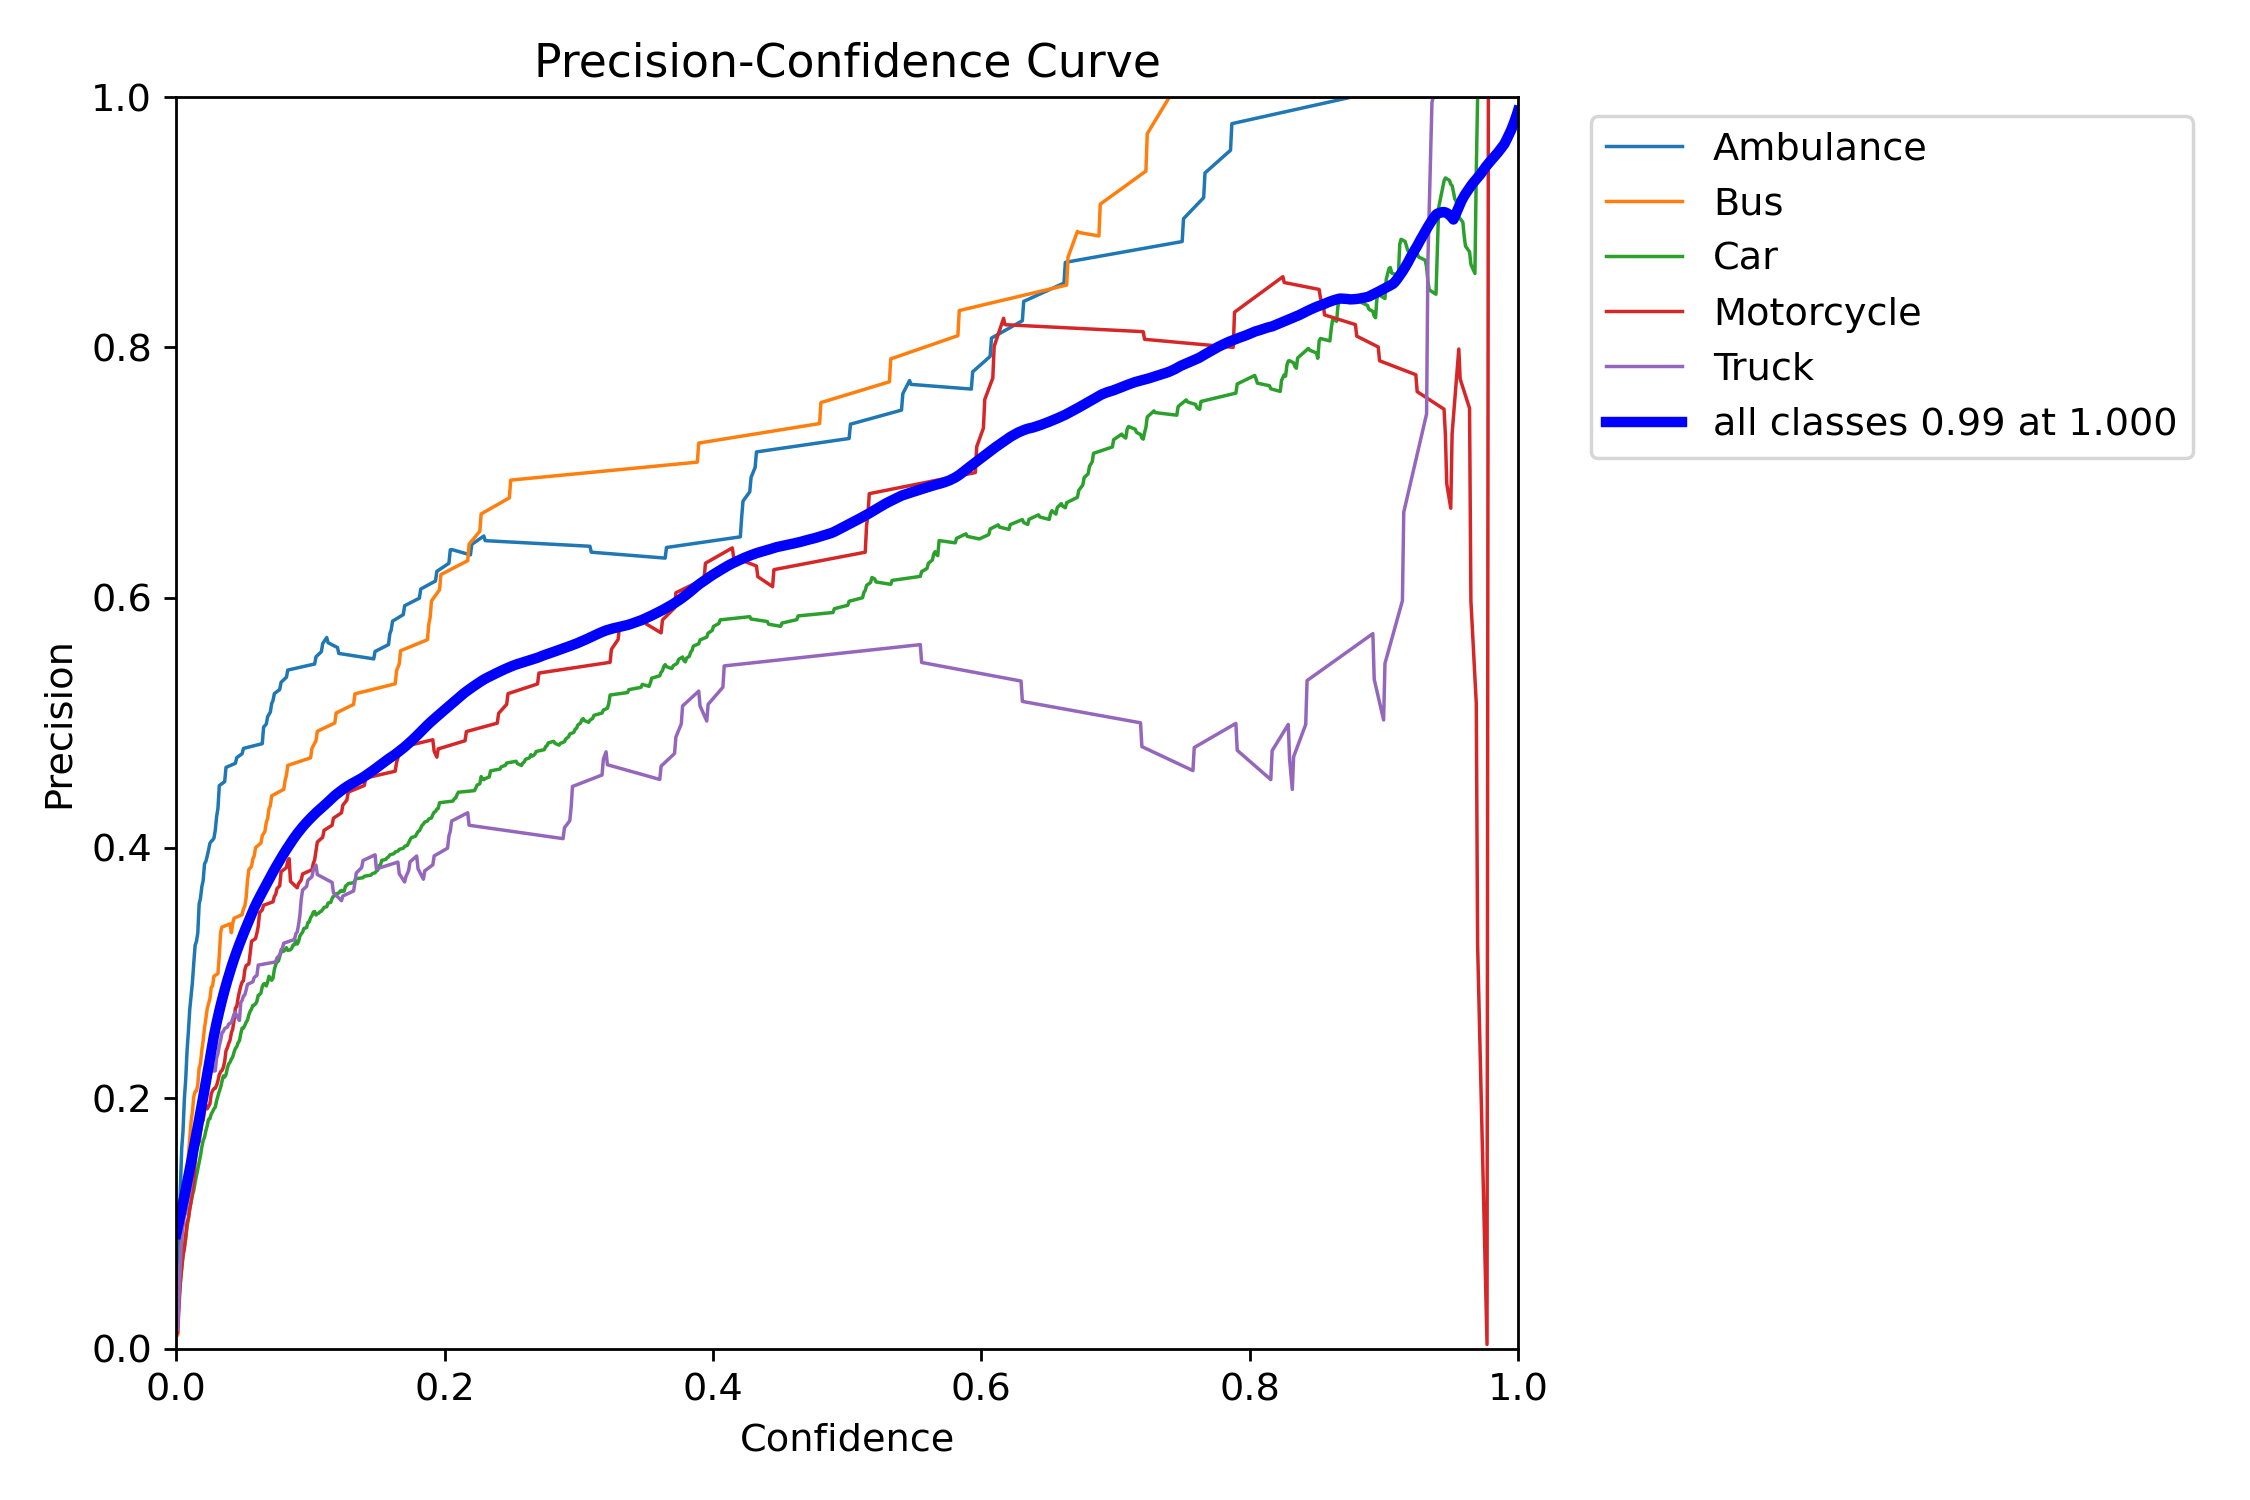

In [11]:
Image("/content/runs/detect/train2/P_curve.png", width=600)

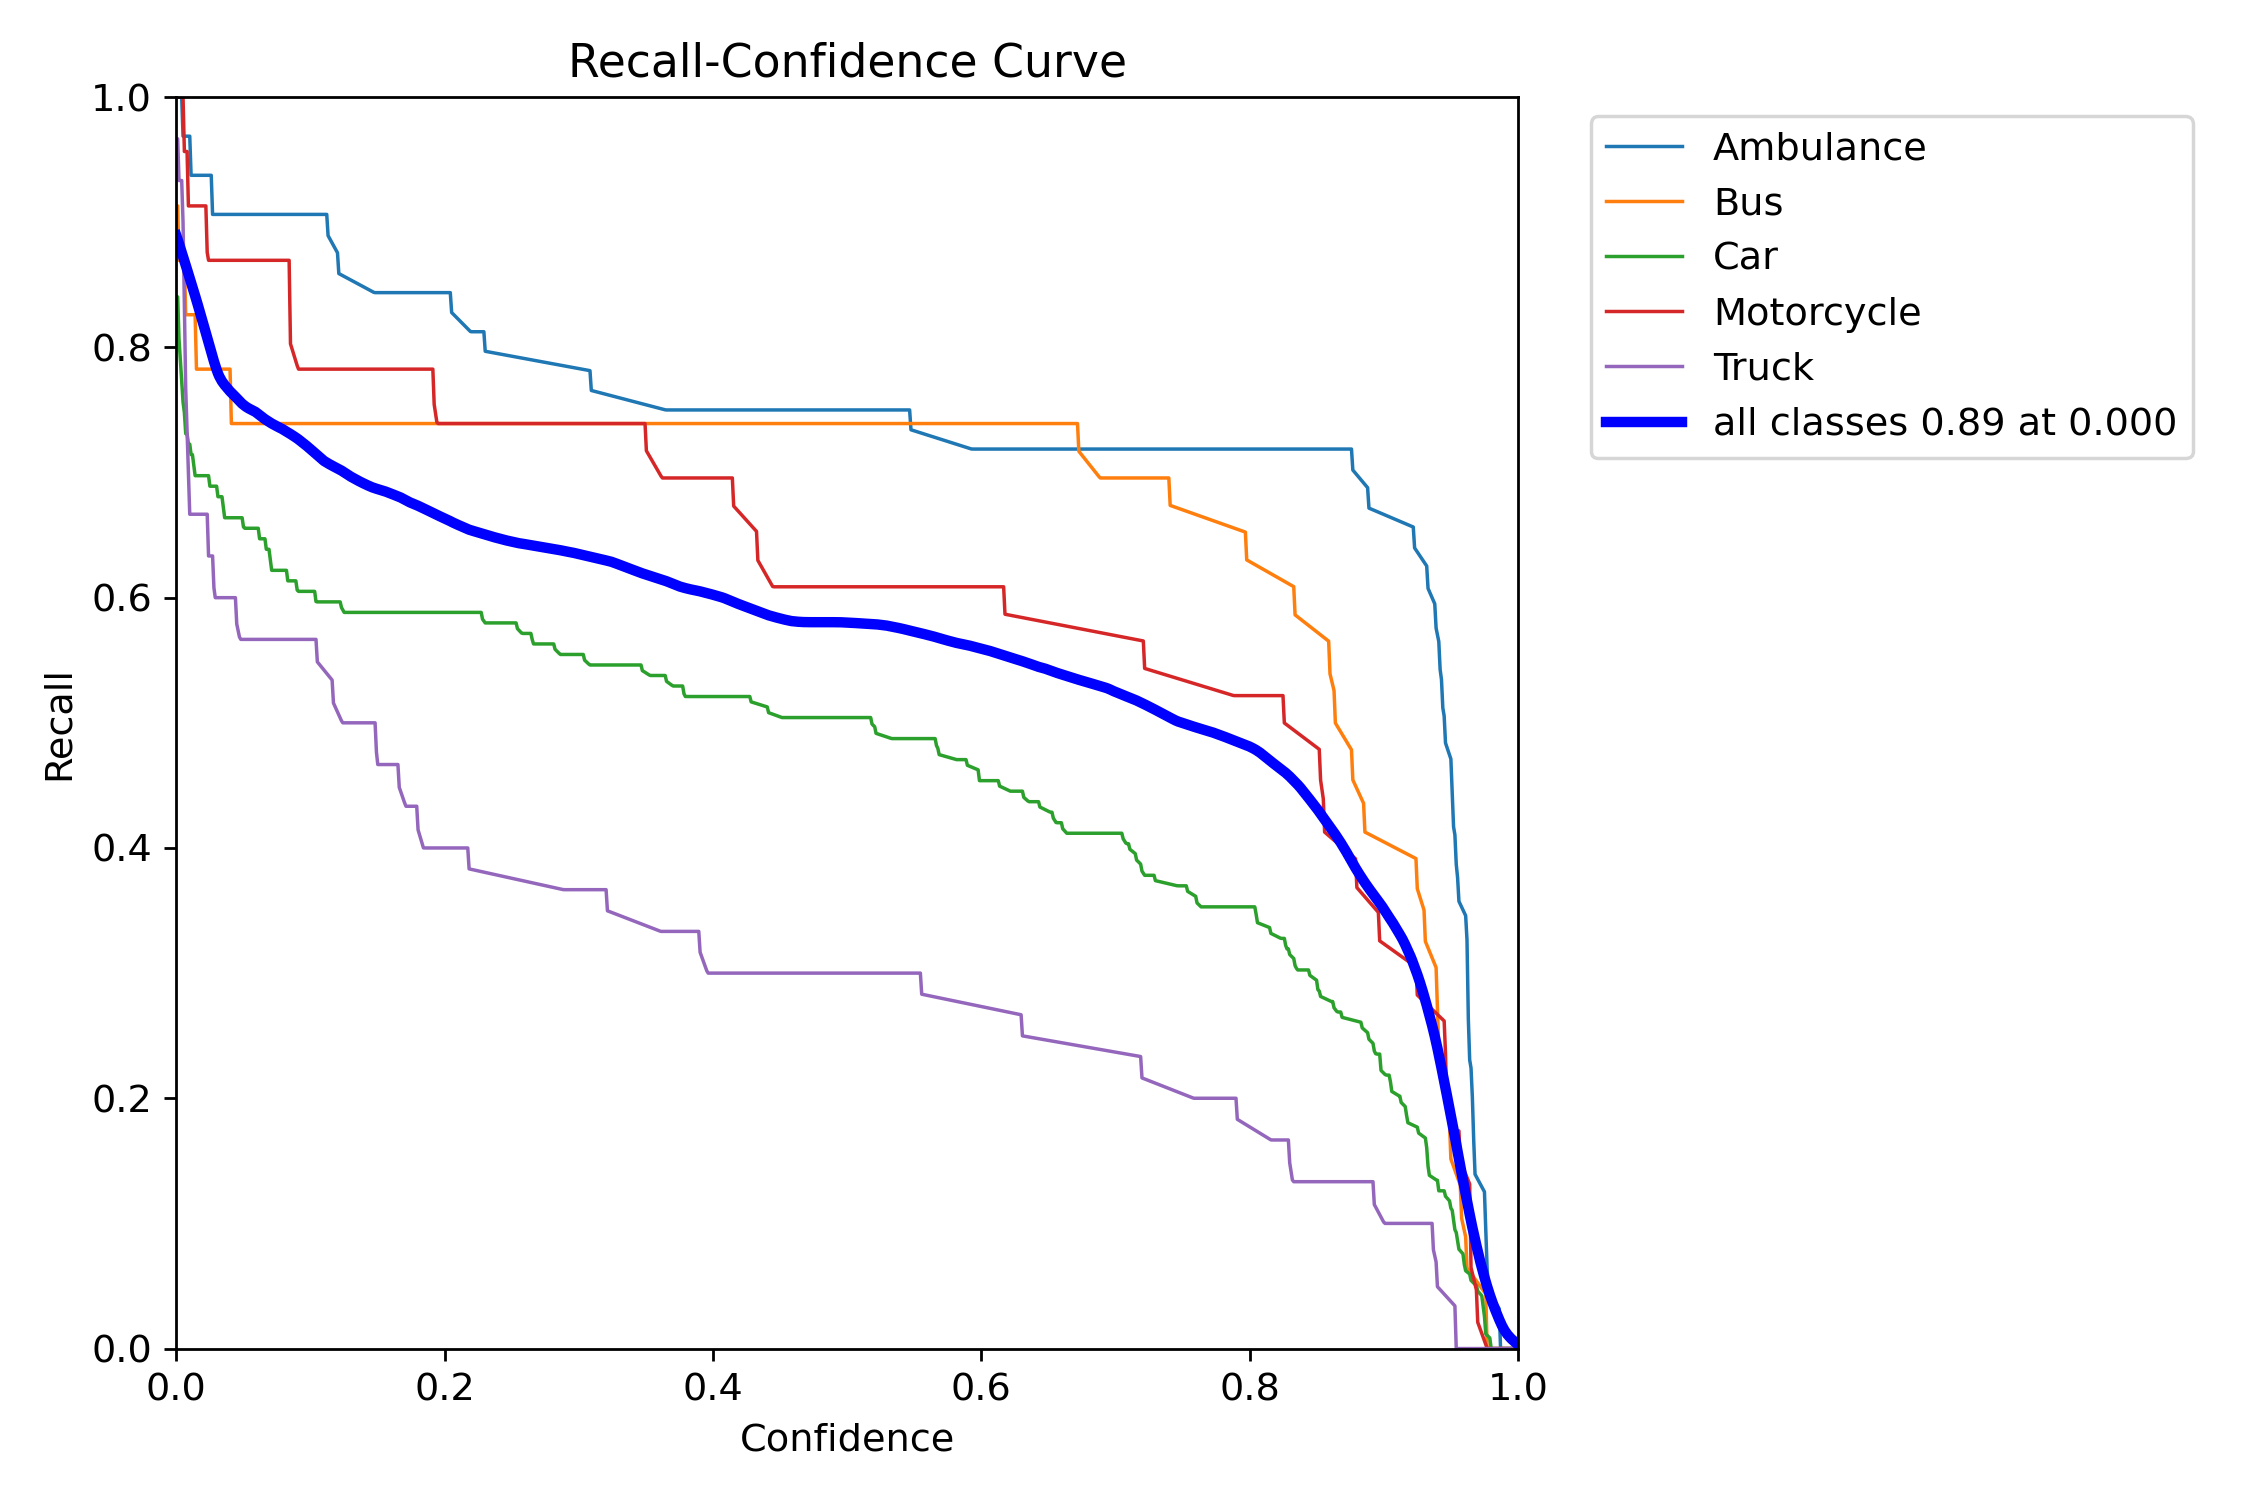

In [13]:
Image("/content/runs/detect/train2/R_curve.png", width=600)

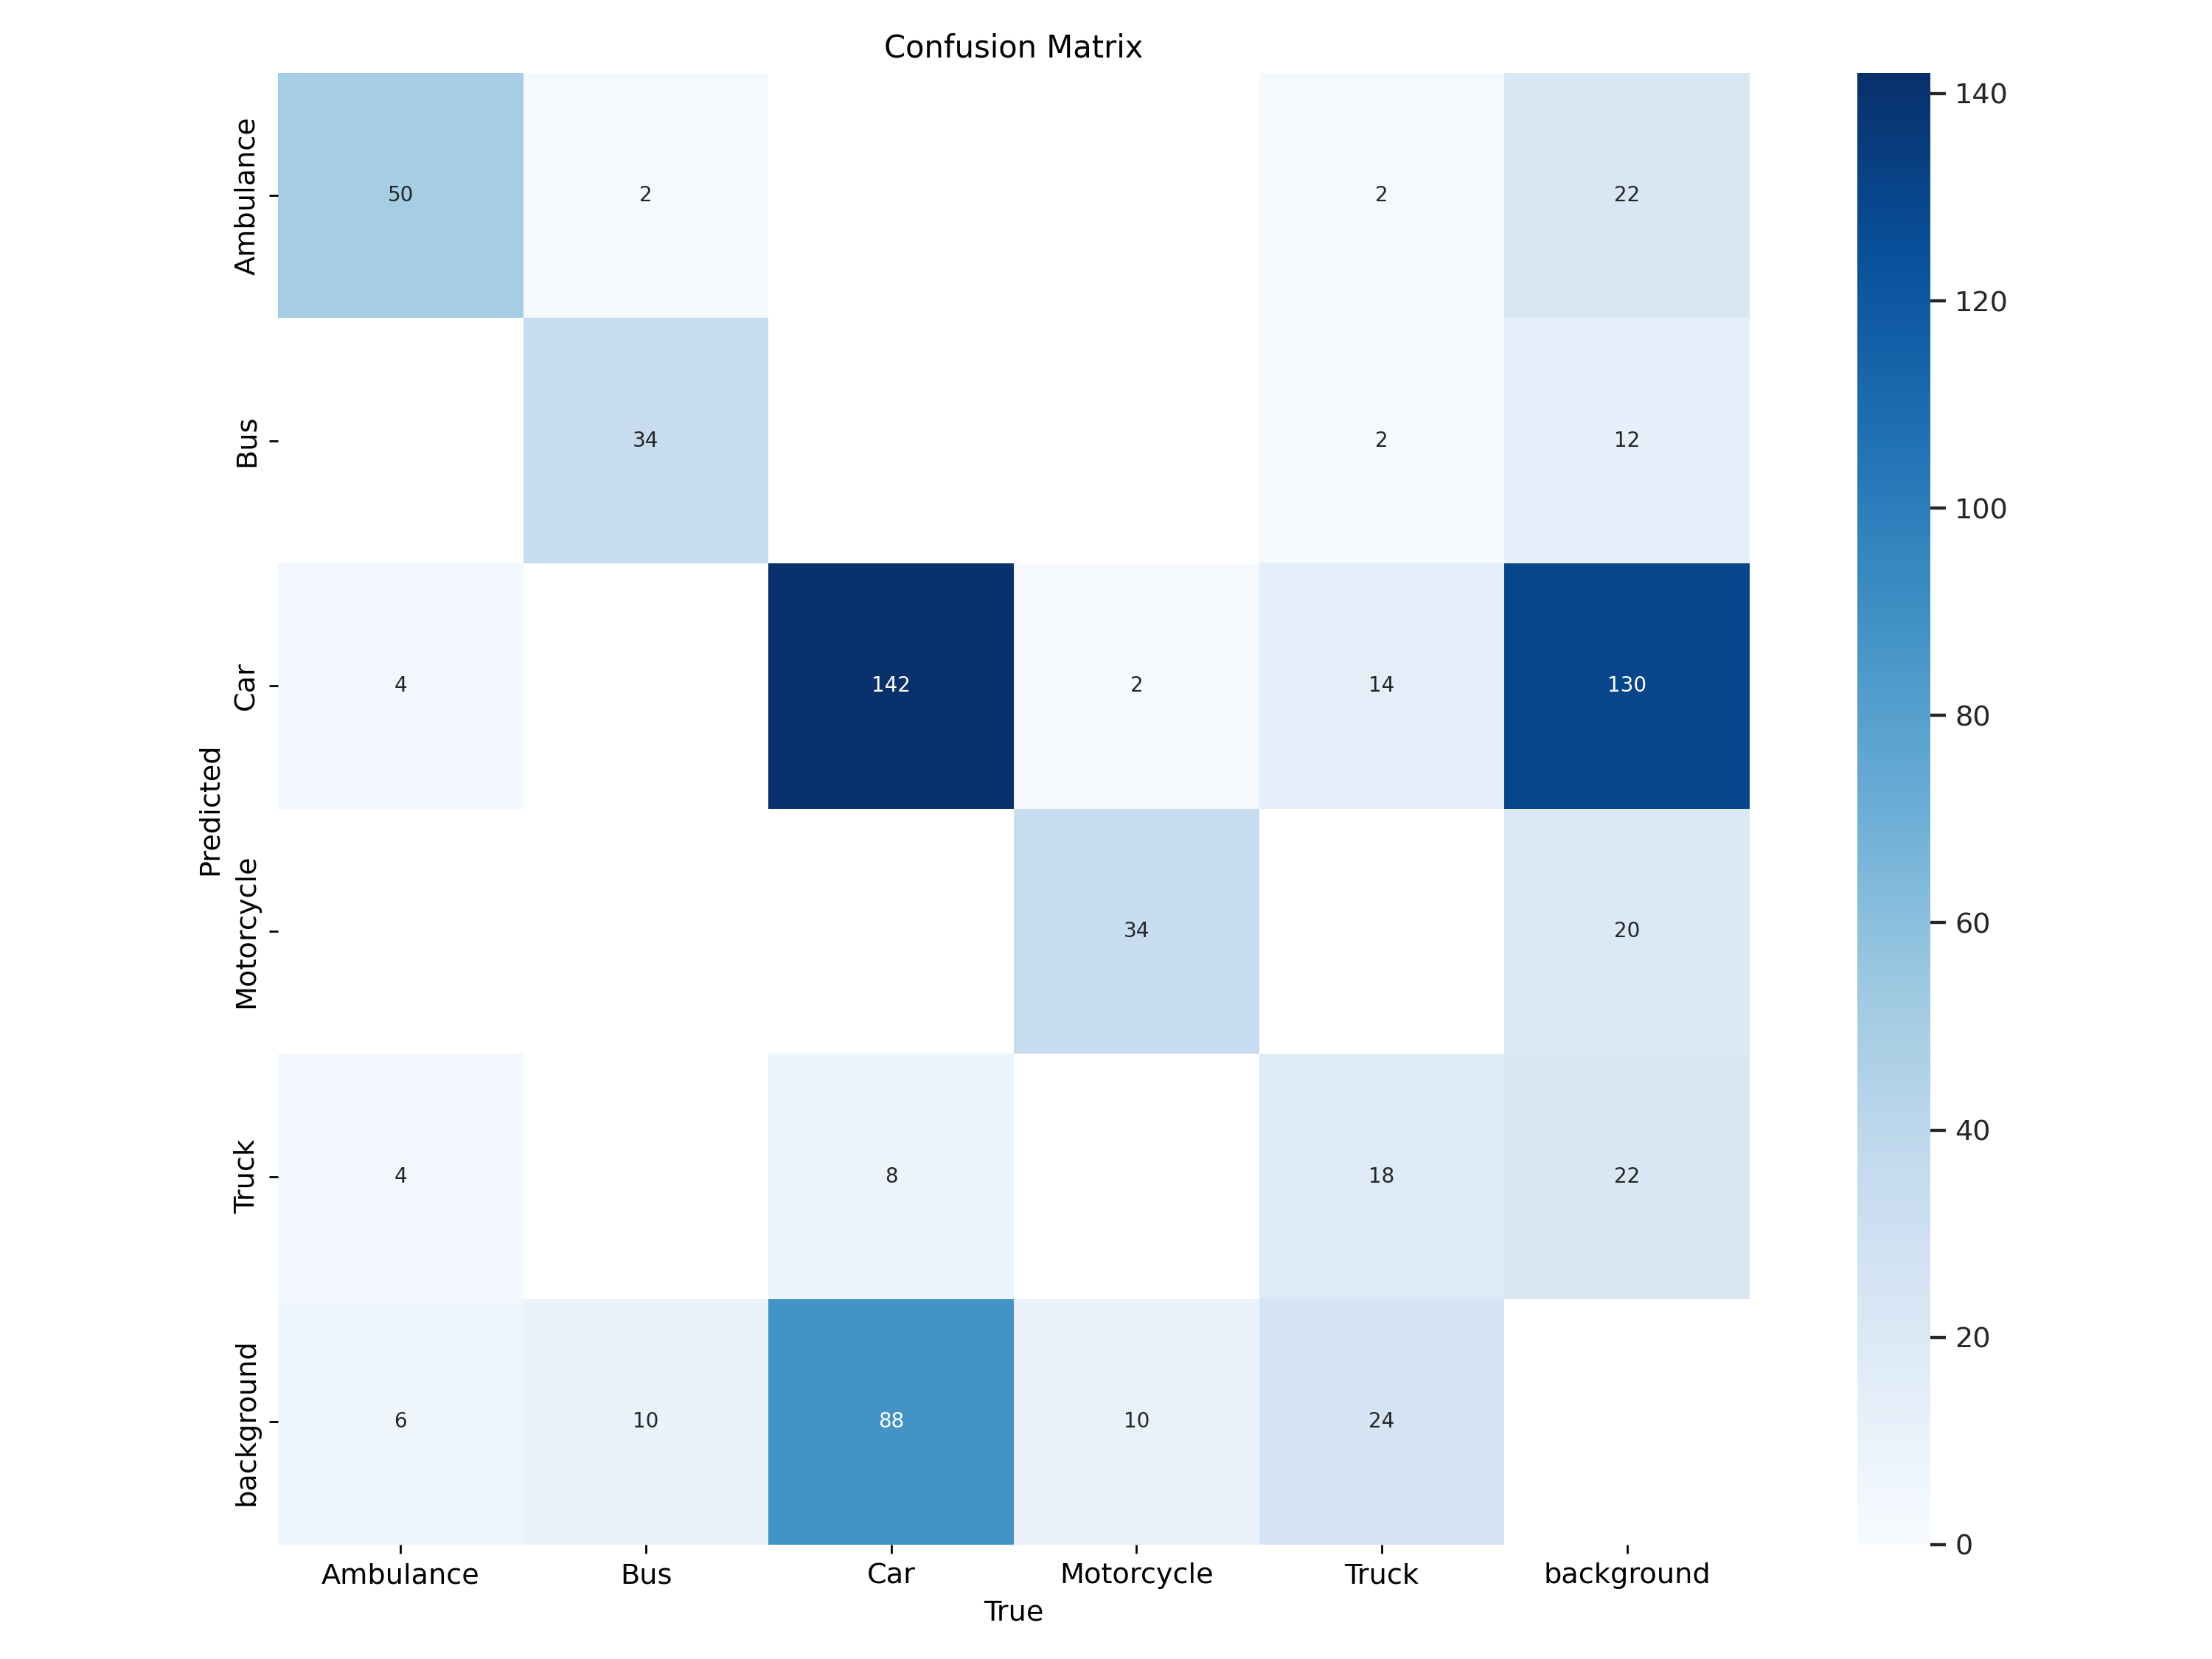

In [14]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

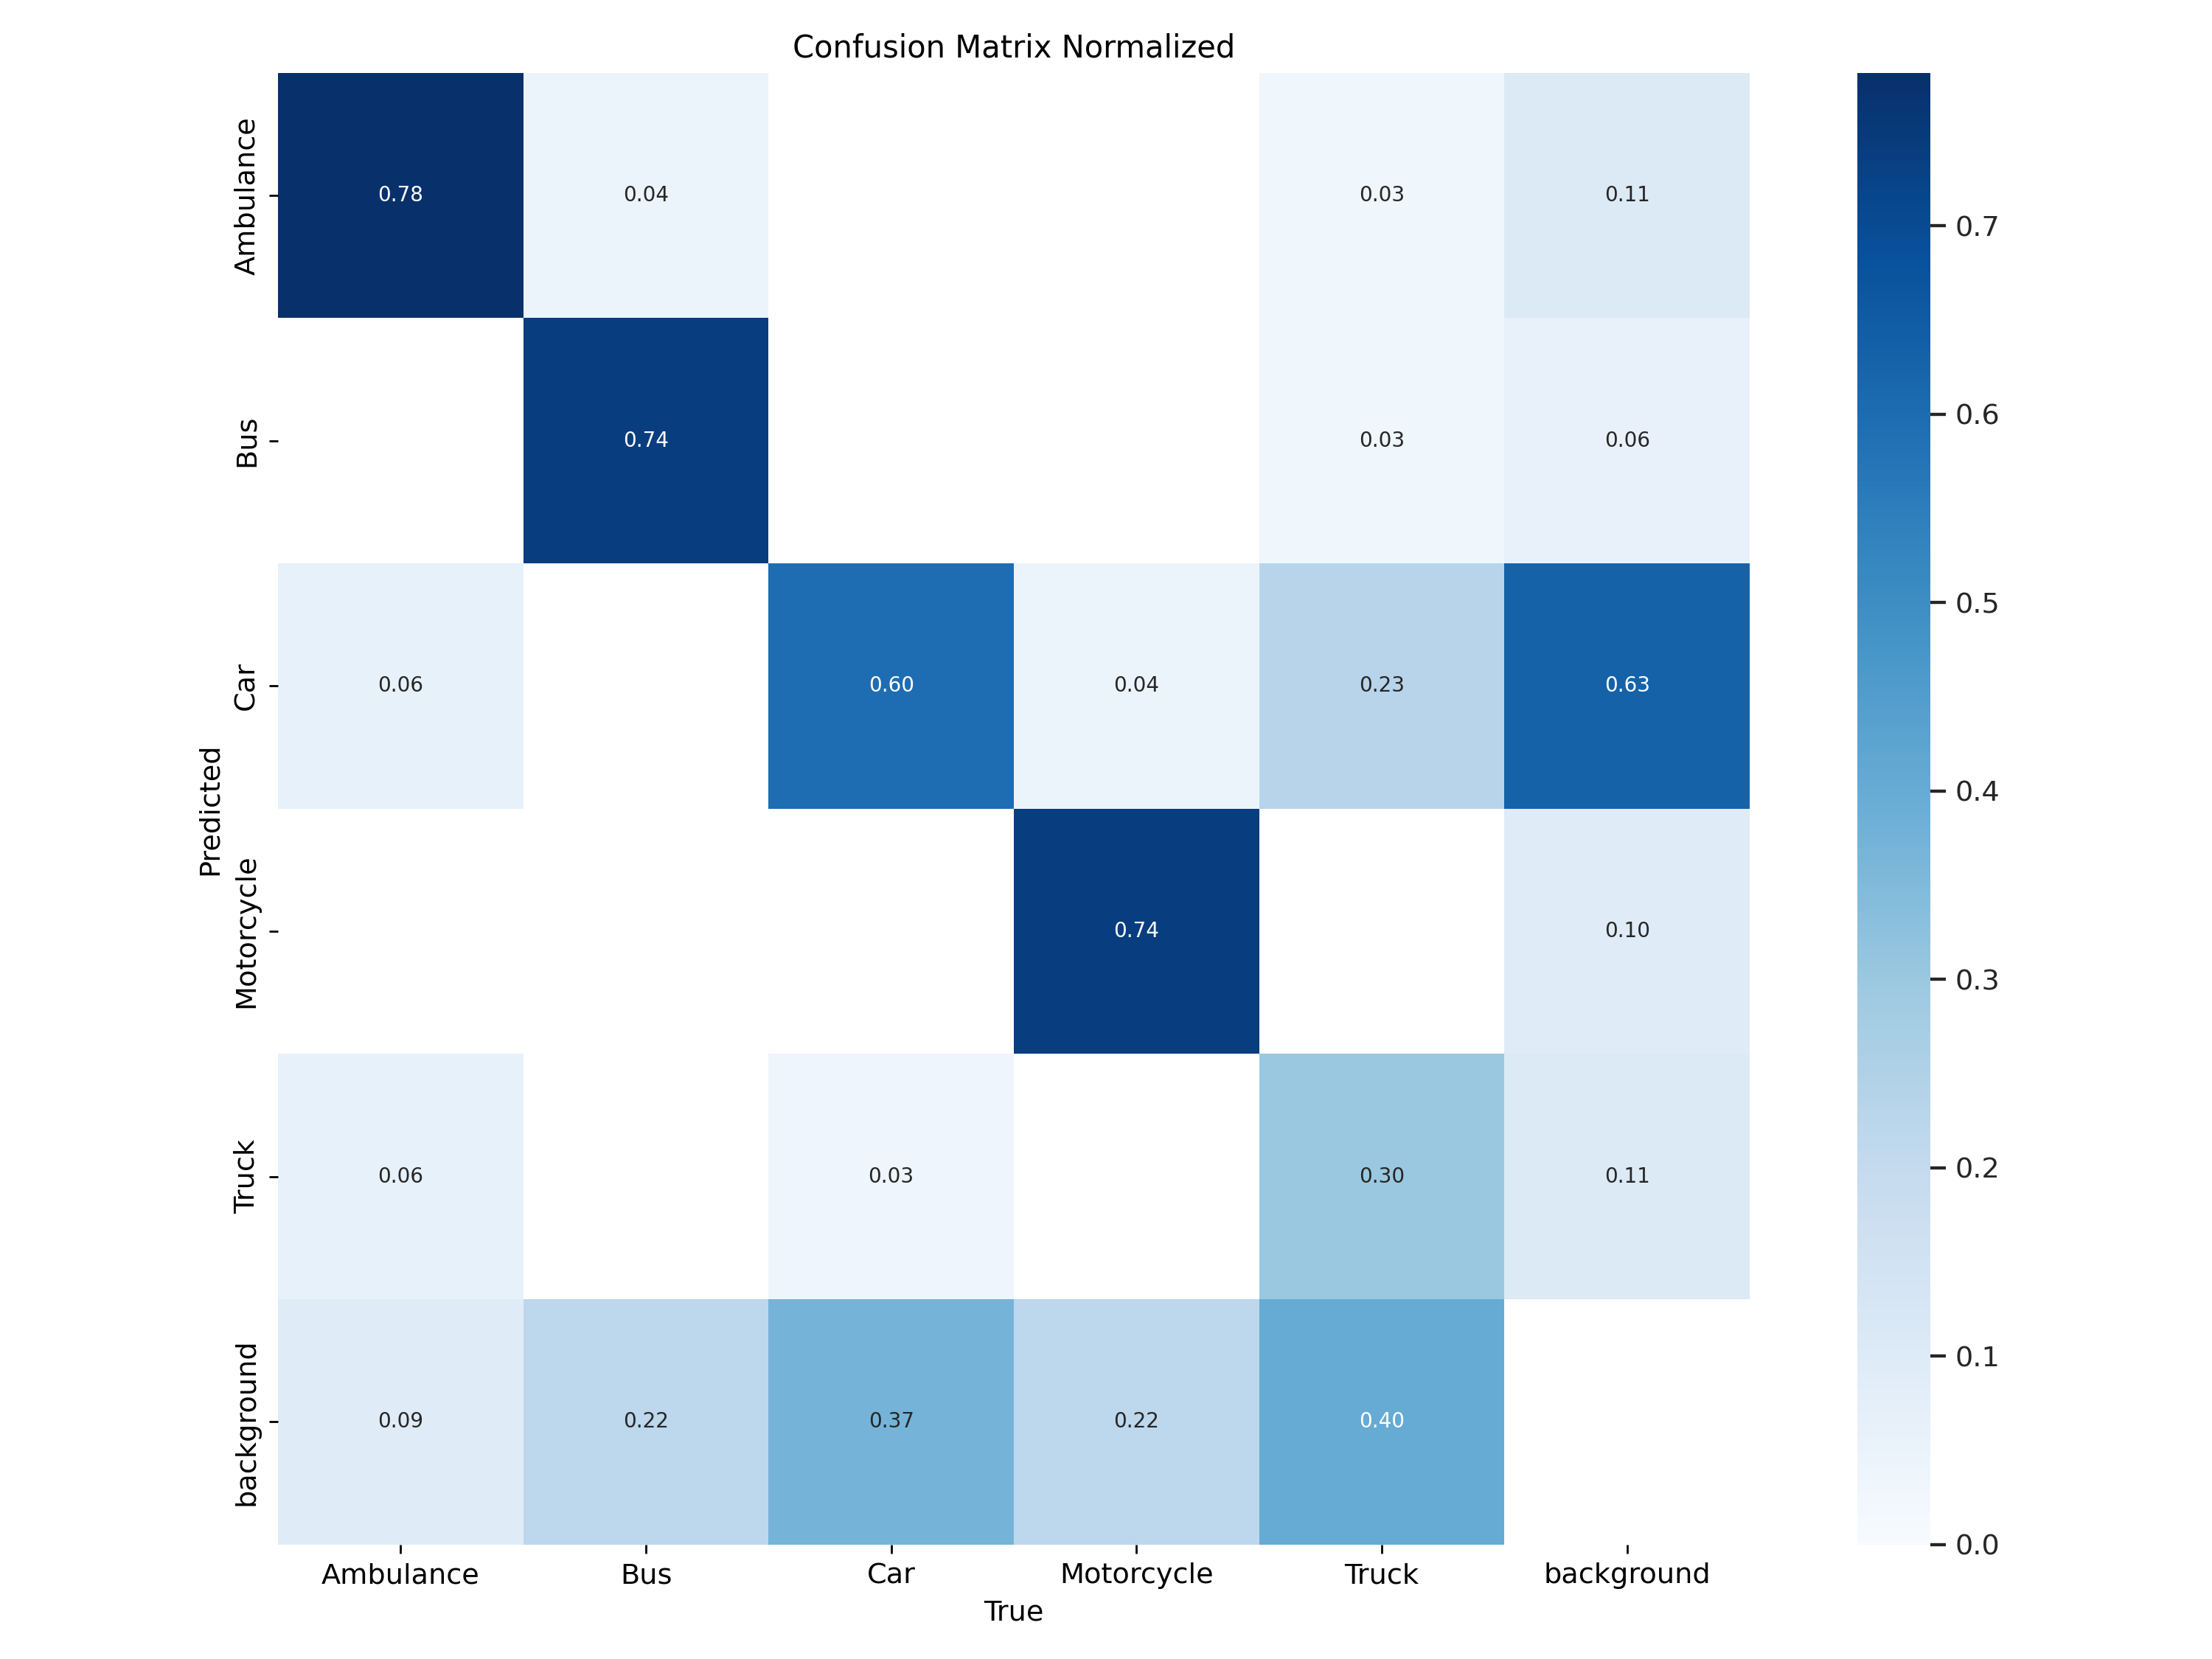

In [15]:
Image("/content/runs/detect/train2/confusion_matrix_normalized.png", width=600)

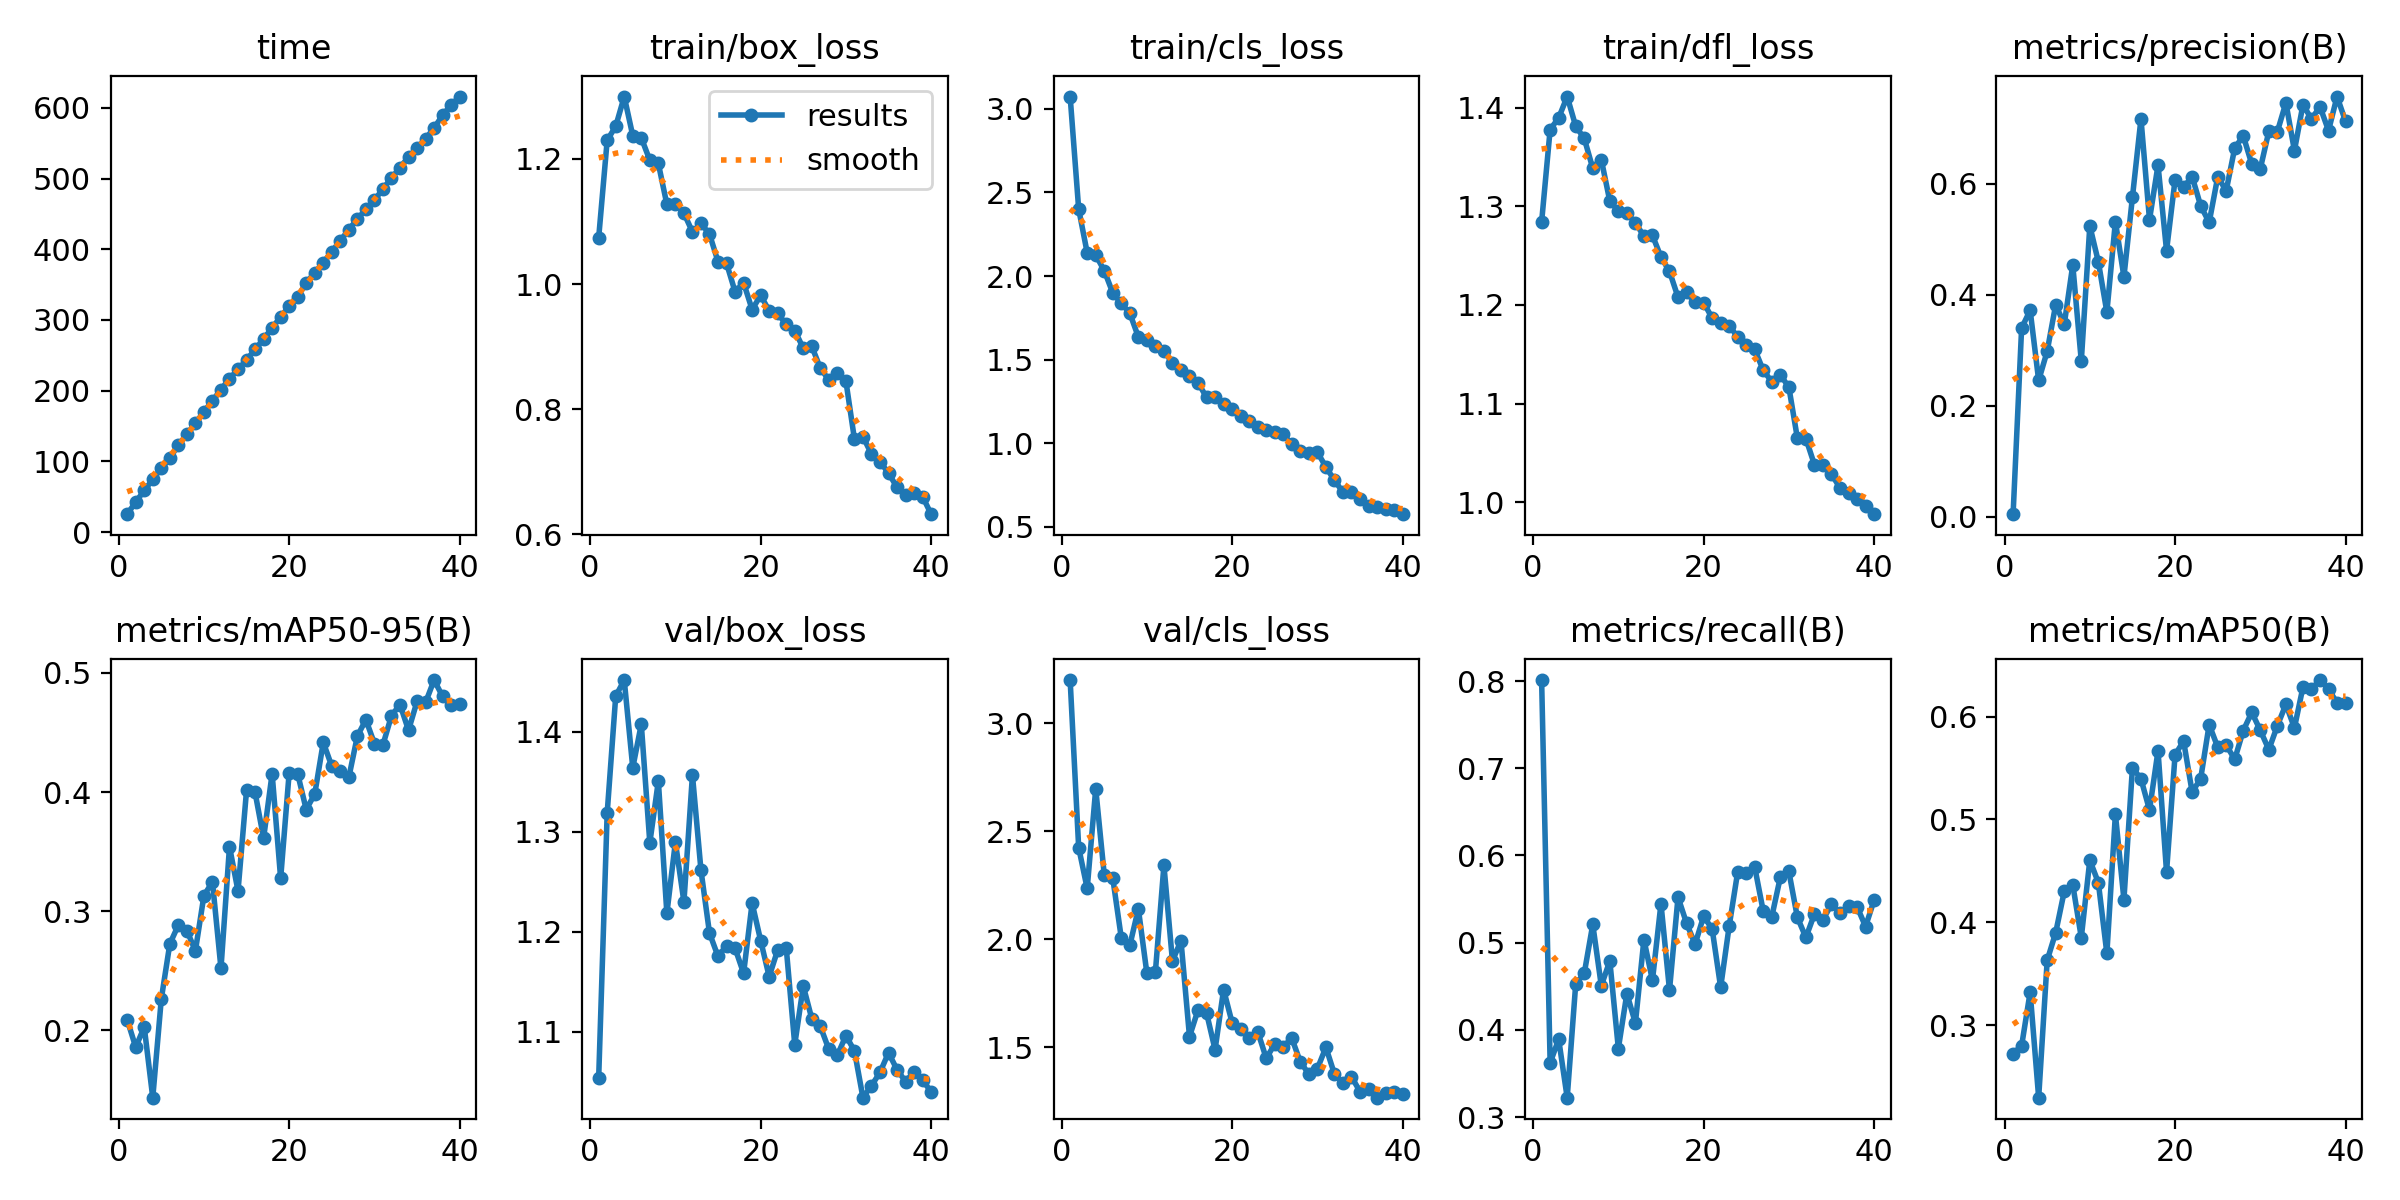

In [16]:
Image("/content/runs/detect/train2/results.png", width=600)

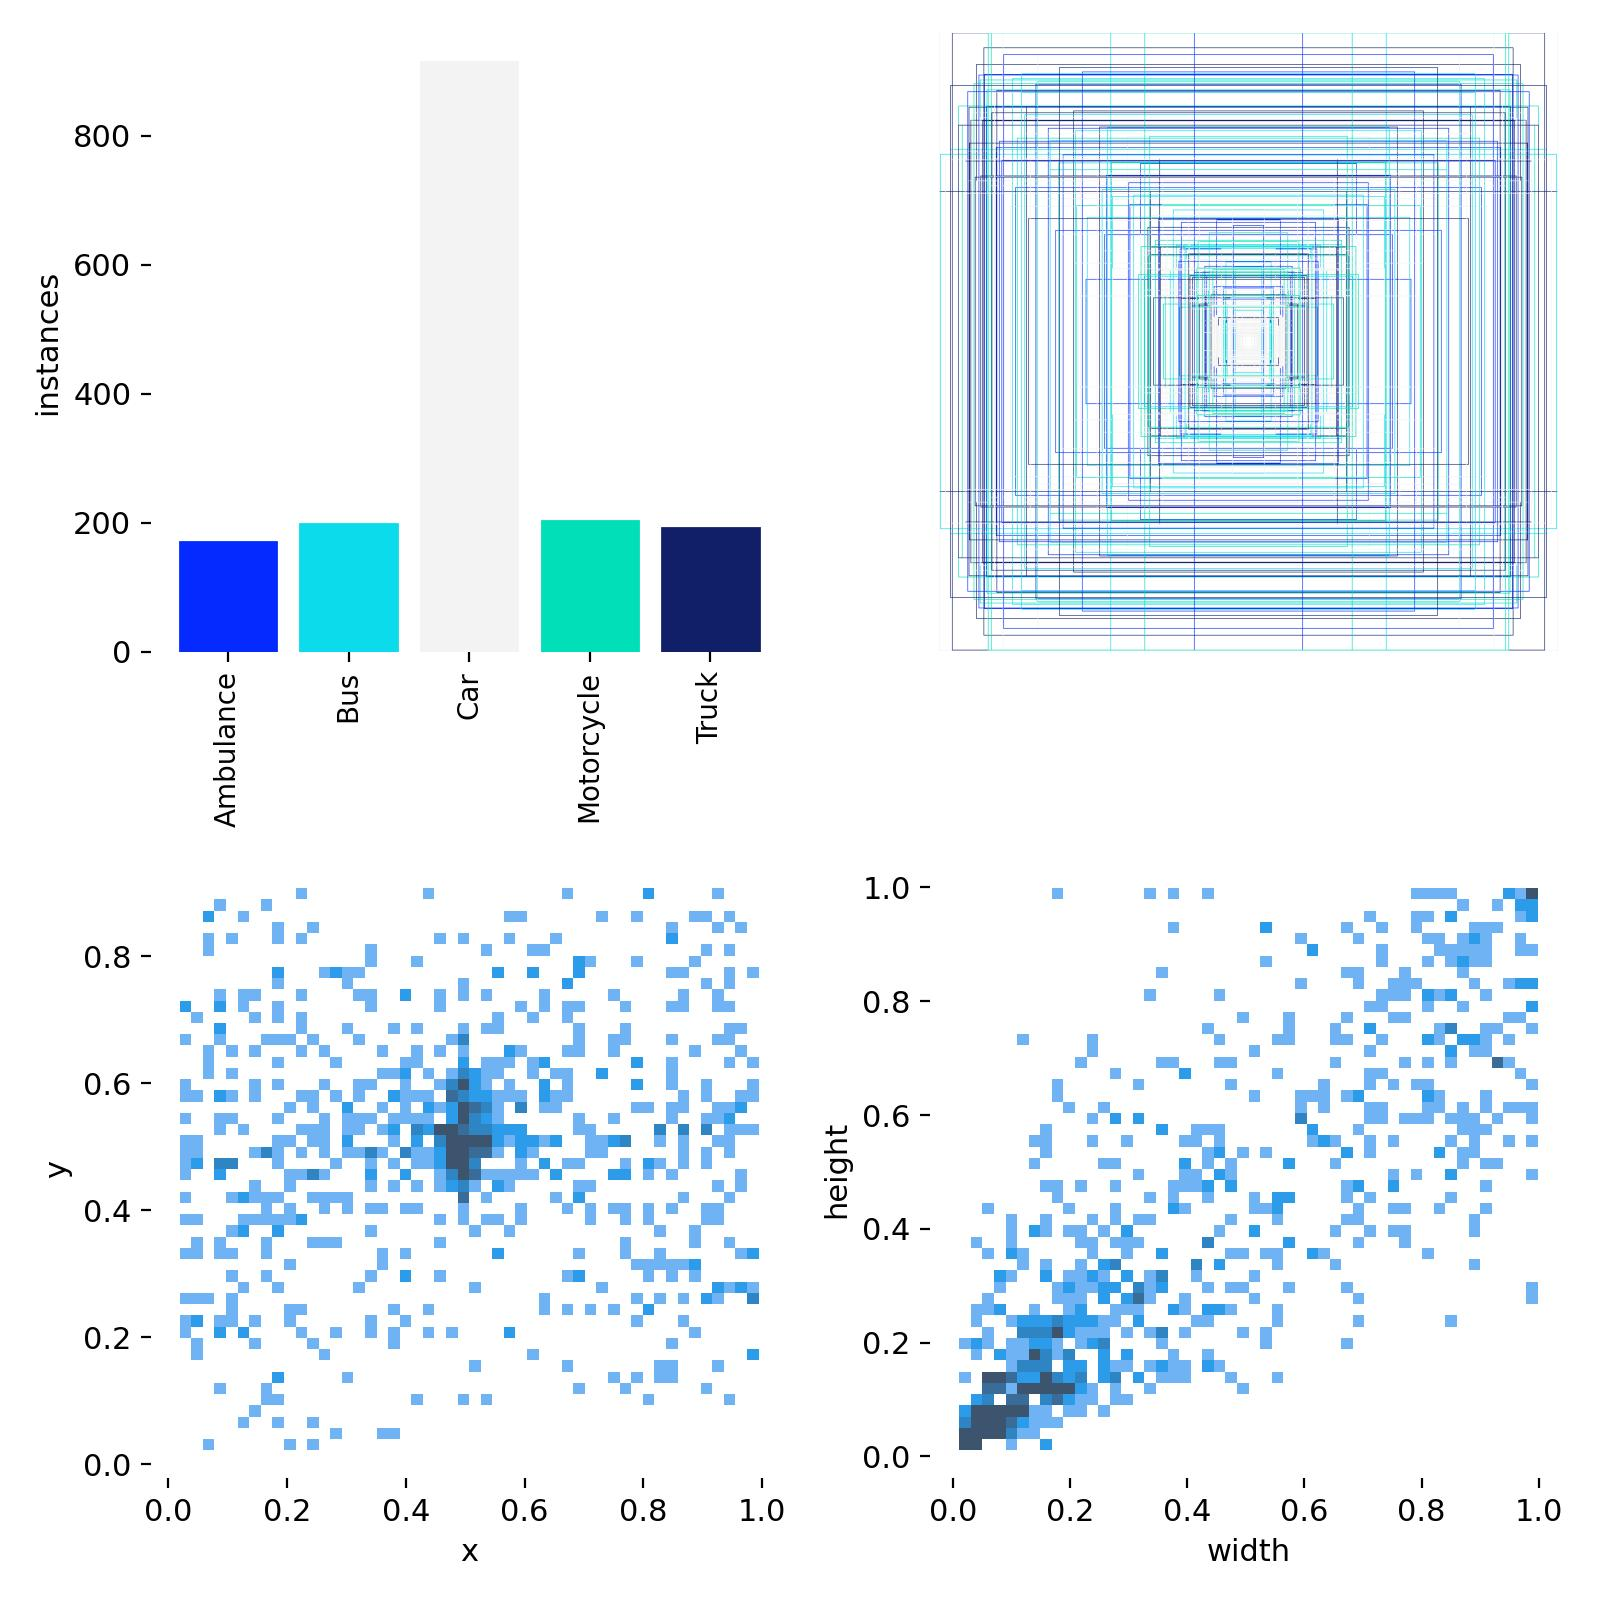

In [17]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

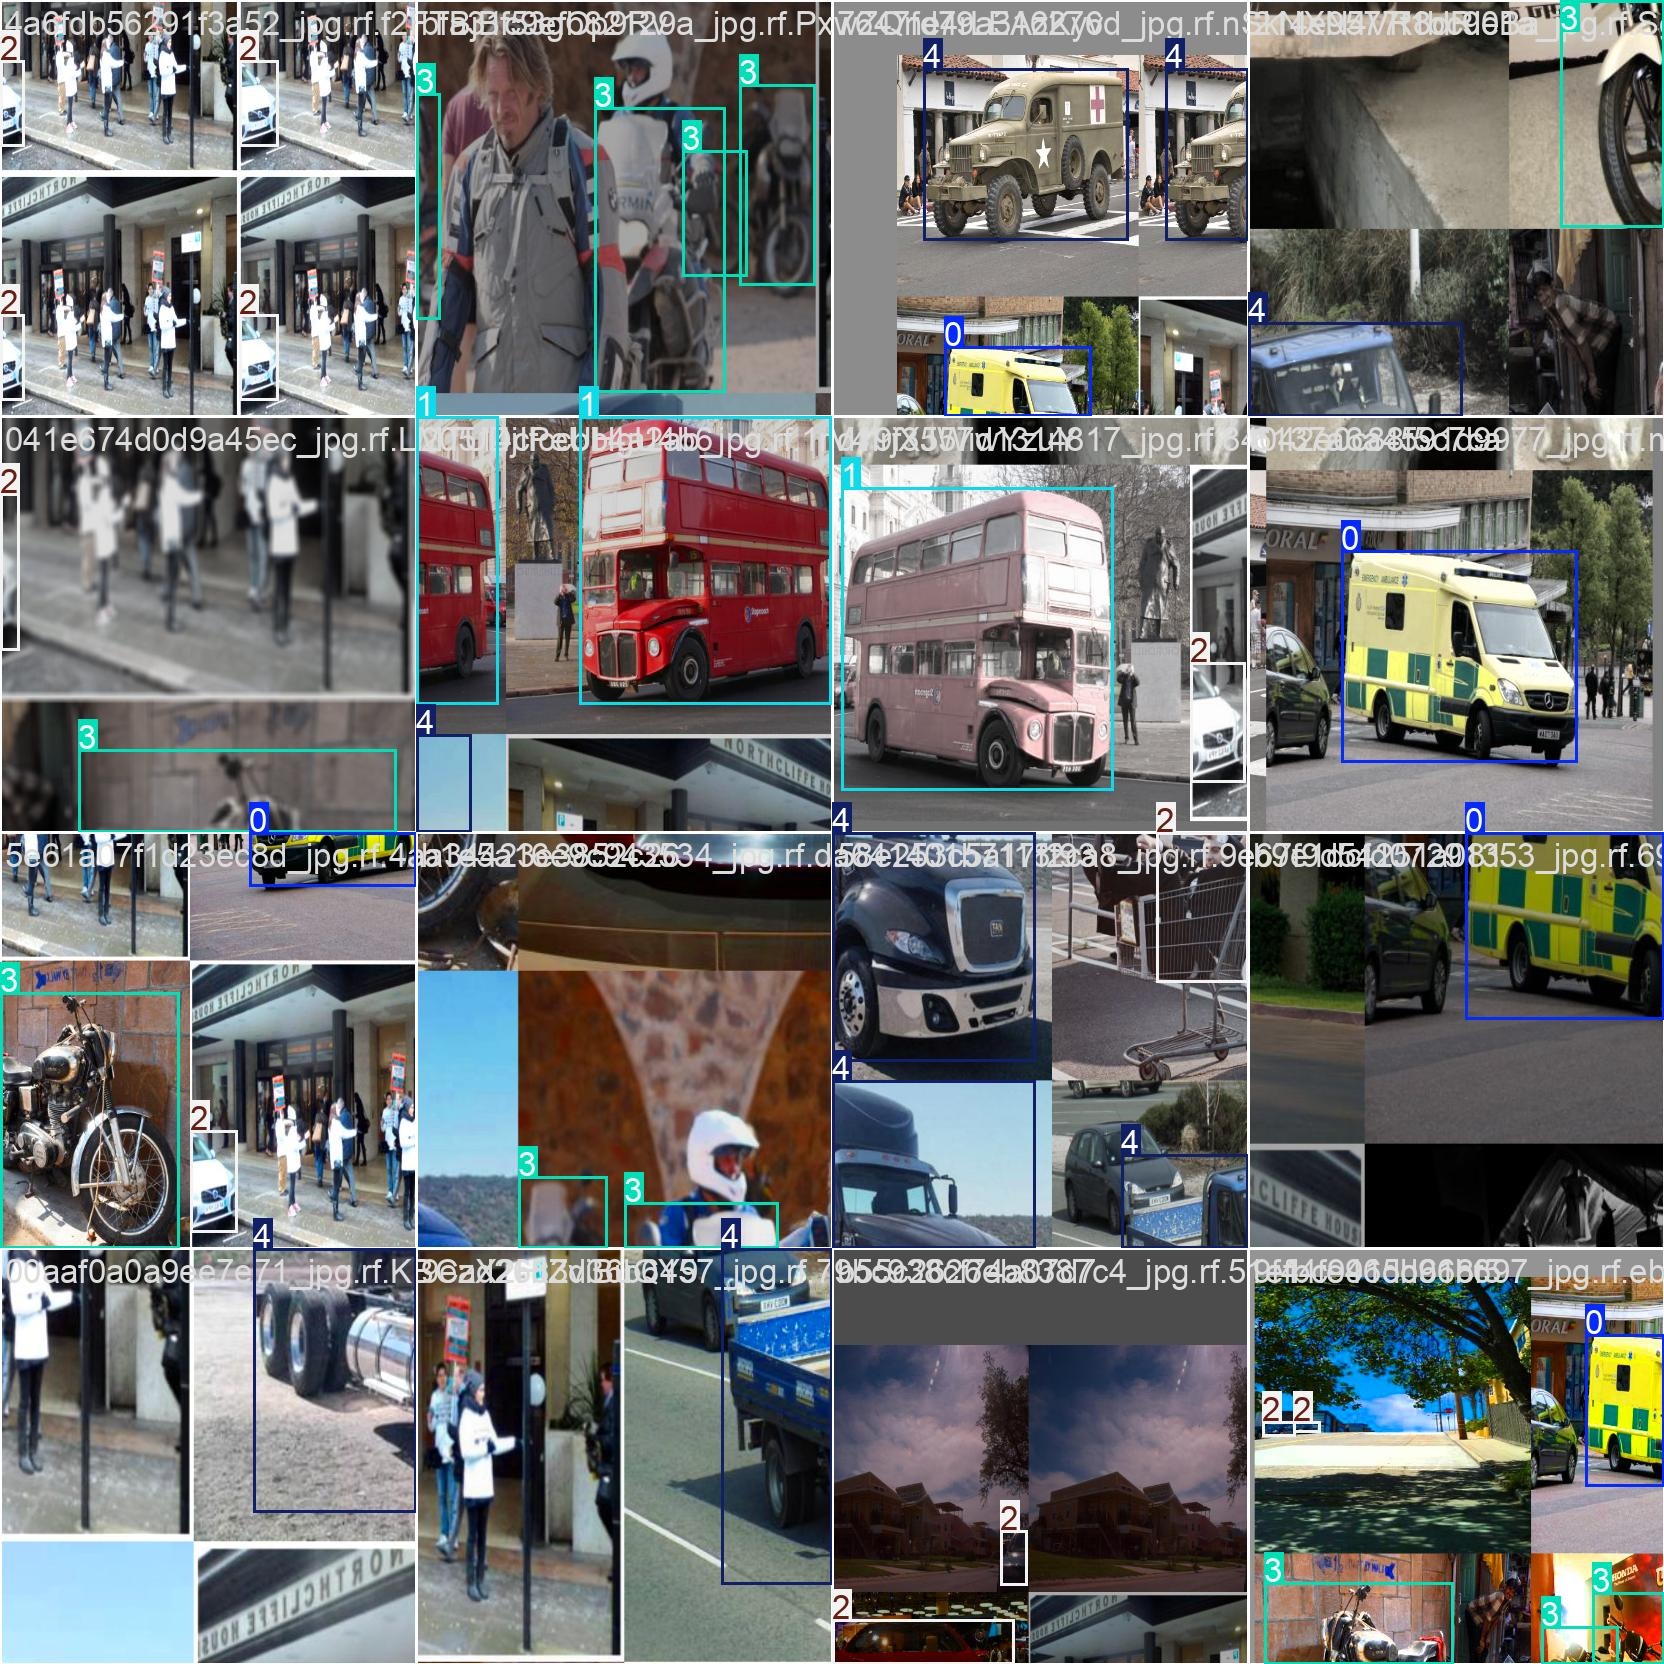

In [18]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

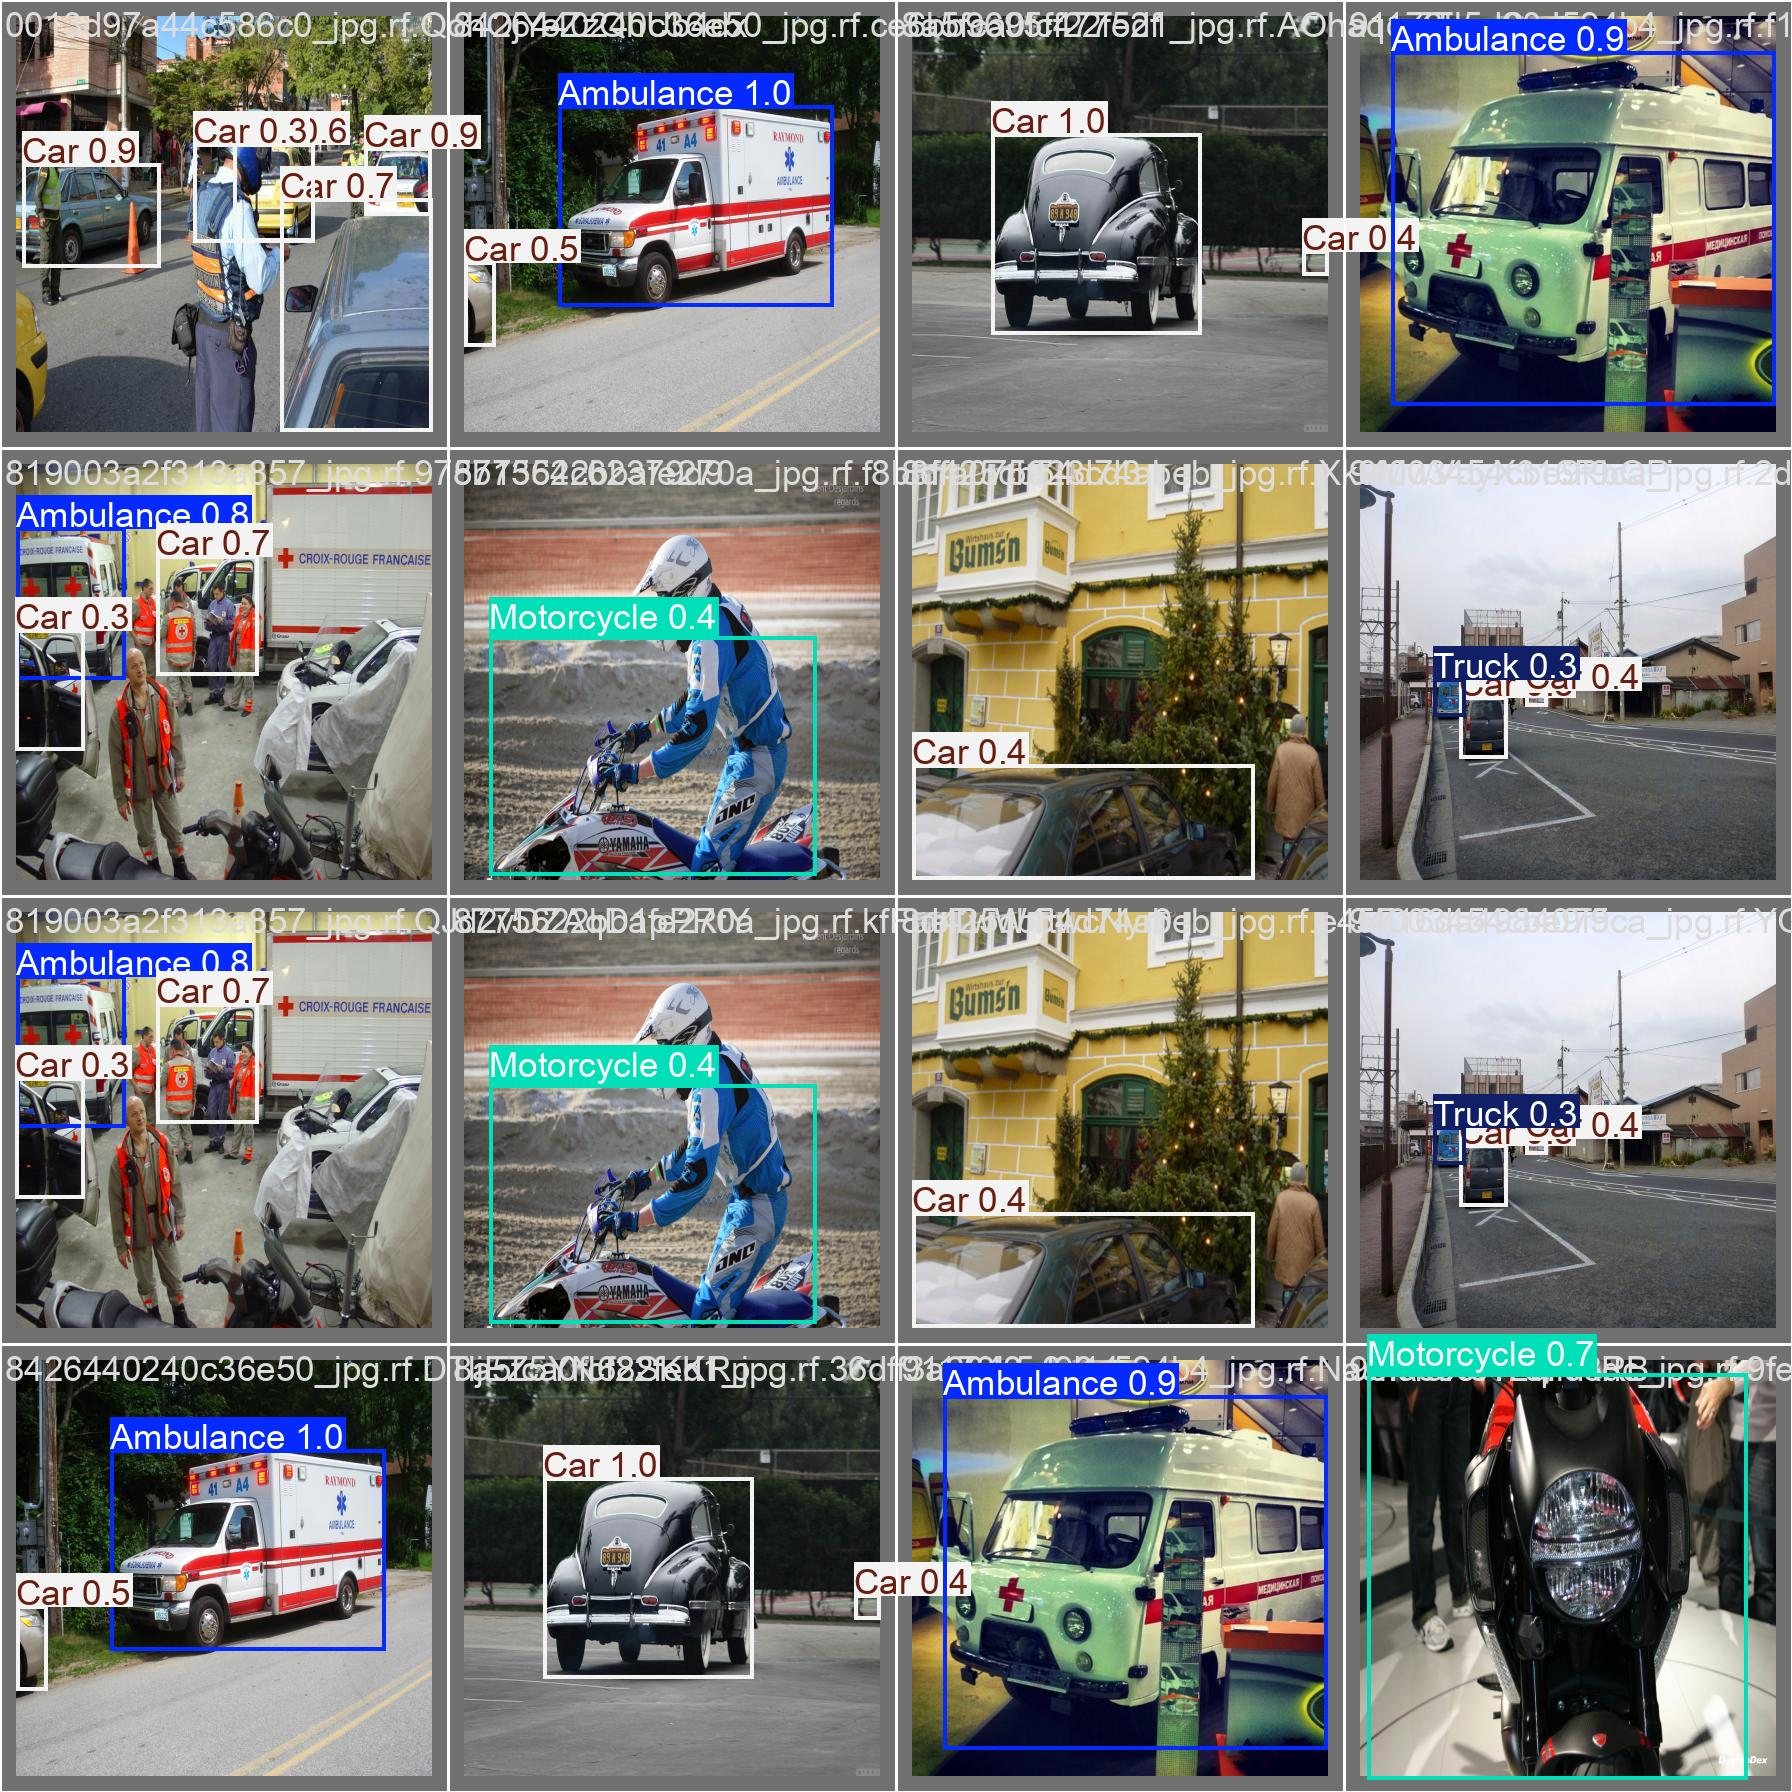

In [19]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

## Validating the fine-tuned model

In [22]:
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data=/content/yolo_dataset/data.yaml

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/yolo_dataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100% 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:03<00:00,  4.12it/s]
                   all        250        454      0.738       0.54      0.635      0.495
             Ambulance         50         64      0.849      0.719      0.863      0.752
                   Bus         30         46      0.848      0.739      0.764      0.663
                   Car         90        238      0.665       0.42      0.503      0.333
            Motorcycle         42         46      0.816      0.579       0.67      0.438
                 Truck         38         60      0.512      0.245      0.377      0.287
Speed: 0.6ms preprocess, 3.2ms inference, 0.0ms lo

## Inference on a fine-tuned model

In [23]:
!yolo task=detect mode=predict model= "/content/runs/detect/train2/weights/best.pt" conf=0.25 source=/content/yolo_dataset/test/images save=True

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/126 /content/yolo_dataset/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg: 416x416 1 Ambulance, 14.5ms
image 2/126 /content/yolo_dataset/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg: 416x416 1 Ambulance, 9.9ms
image 3/126 /content/yolo_dataset/test/images/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg: 416x416 3 Buss, 10.3ms
image 4/126 /content/yolo_dataset/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg: 416x416 3 Buss, 9.4ms
image 5/126 /content/yolo_dataset/test/images/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg: 416x416 3 Buss, 9.5ms
image 6/126 /content/yolo_dataset/test/images/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg: 416x416 3 Buss, 9.6ms
image 7/126 /content/yolo_dataset/test/images/10c26c6598677a1f_jpg.rf.USCbBYVcU

## Visualising predictions made by the fine-tuned model

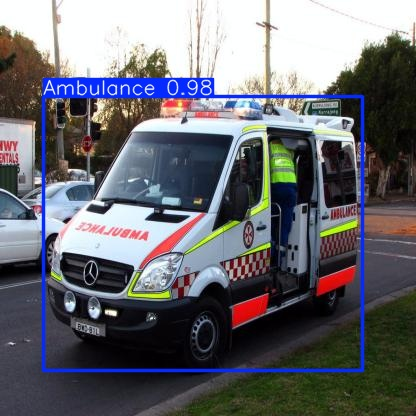

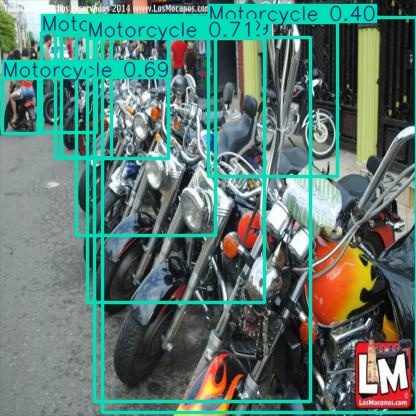

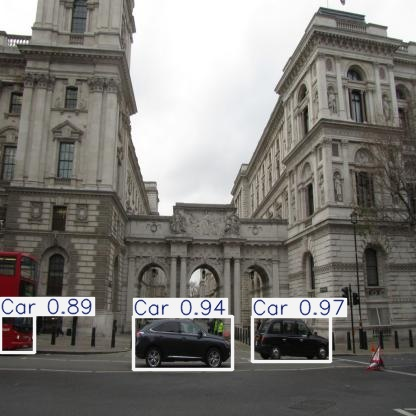

In [24]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")